# `Problem statement (Term Deposit Sale)`

### ***`Goal: `***

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


###  ***`Resources Available: `***
The historical data for this project is available in file

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

###  ***`Deliverable – 1 (Exploratory data quality report reflecting the following) – (20):  `*** 

**1. Univariate analysis (12 marks)**
   
   a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers. 
   
   b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
   
   c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.



**2. Multivariate analysis (8 marks)**

   a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
   
   b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots




###  ***`Deliverable – 2 (Prepare the data for analytics) – (10) `*** 

1. Ensure the attribute types are correct. If not, take appropriate actions.

2. Get the data model ready.

3. Transform the data i.e. scale / normalize if required

4. Create the training set and test set in ratio of 70:30


###  ***`Deliverable – 3 (create the ensemble model) – (30)`*** 

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. **(10 marks)**

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) **(15 marks)**

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. **(5 marks)**

###  ***`Attribute Information:`***

***`Input variables:`***

*Bank client data:*

1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

*Related to previous contact:*

9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

*Other attributes:*

13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

***`Output variable (desired target):`***

17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

# <a id = "link101"></a> `Index: `

- <a href = #link102>**Deliverable – 1 (Exploratory Data Quality Report) – (20):** </a>
    - <a href = #link103>*1. Univariate Analysis (12 Marks)*</a>
    - <a href = #link1001>*2. Multivariate Analysis (8 Marks)*</a>
- <a href = #link104>**Deliverable – 2 (Prepare the data for analytics) – (10)** </a>
    - <a href = #link104>1. Ensure the attribute types are correct. If not, take appropriate actions.</a>
    - <a href = #link105>2. Get the data model ready.</a>
    - <a href = #link105>3. Transform the data i.e. scale / normalize if required</a>
    - <a href = #link106>4. Create the training set and test set in ratio of 70:30</a>
- <a href = #link107>**Deliverable – 3 (create the ensemble model) – (30)**</a>
    - <a href = #link108>1.a. Create models using Logistic Regression. Note the model performance.</a>
    - <a href = #link109>1.b. Create models using Decision Tree algorithm. Note the model performance. **(1.a + 1.b = 10 Marks)**</a>
    - <a href = #link110>2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) **(15 marks)**</a>
    - <a href = #link111>3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. **(5 marks)**</a>

## `Deliverable – 1 (Exploratory Data Quality Report)` <a id = "link102"></a>

<a href = #link101> Back to Index </a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from os import system
from sklearn.linear_model import LogisticRegression
from IPython.display import Image  
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [2]:
#Read Data
pdata  = pd.read_csv('bank-full.csv')
pdata.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

**`Observation:`** ***No nulls observed. However, many unknowns found. Most of these 'Unknowns' can be considered as missing values.***

### <a id = "link103"></a> ***`1. Univariate Analysis:`***

<a href = #link101> Back to Index </a>

In [3]:
#Stastical Analysis
print(pdata.shape)

(45211, 17)


In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
pdata.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [6]:
#Outlier Analysis: Method used: IQR

percentile_25 = {}
percentile_75 = {}
iqr = {}
lower_bound = {}
upper_bound = {}

for i in pdata:
    if pdata[i].dtypes == "int64":
        percentile_25[i] = np.percentile(pdata[i],25)
        percentile_75[i] = np.percentile(pdata[i],75)
        iqr[i] = percentile_75[i] - percentile_25[i]
        lower_bound[i] = percentile_25[i] - (1.5 * iqr[i])
        upper_bound[i] = percentile_75[i] + (1.5 * iqr[i])
        
        
print(percentile_25)
print(percentile_75)
print(iqr)
print(lower_bound)
print(upper_bound)
print("\n")

for i in pdata:
    if pdata[i].dtypes == "int64":
        print("Count of lower bound outliers for column "+ i + ": " + str(pdata[i][pdata[i] < lower_bound[i]].count()))
        print("Count of upper bound outliers for column "+ i + ": " + str(pdata[i][pdata[i] > upper_bound[i]].count()))

{'age': 33.0, 'balance': 72.0, 'day': 8.0, 'duration': 103.0, 'campaign': 1.0, 'pdays': -1.0, 'previous': 0.0}
{'age': 48.0, 'balance': 1428.0, 'day': 21.0, 'duration': 319.0, 'campaign': 3.0, 'pdays': -1.0, 'previous': 0.0}
{'age': 15.0, 'balance': 1356.0, 'day': 13.0, 'duration': 216.0, 'campaign': 2.0, 'pdays': 0.0, 'previous': 0.0}
{'age': 10.5, 'balance': -1962.0, 'day': -11.5, 'duration': -221.0, 'campaign': -2.0, 'pdays': -1.0, 'previous': 0.0}
{'age': 70.5, 'balance': 3462.0, 'day': 40.5, 'duration': 643.0, 'campaign': 6.0, 'pdays': -1.0, 'previous': 0.0}


Count of lower bound outliers for column age: 0
Count of upper bound outliers for column age: 487
Count of lower bound outliers for column balance: 17
Count of upper bound outliers for column balance: 4712
Count of lower bound outliers for column day: 0
Count of upper bound outliers for column day: 0
Count of lower bound outliers for column duration: 0
Count of upper bound outliers for column duration: 3235
Count of lower bo

***`Observations:`*** 

<a href = #link101> Back to Index </a>

1. Data consists of 45211 rows and 17 columns. 
2. There are 10 categorical (DType = object) columns. 7 numeric columns. *Target* is the output column. It is also a categorical column.
3. By column definition, pdays can contain a negative value (-1 tells us the person has not been contacted or contact period is beyond 900 days). min value is -1, meaning data doesn't look polluted. Also, for this column more than 75% rows have value -1. Primary analysis suggests that this column may not be significant in prediction. 
4. Balance has negative values. Check how many rows have negative values.
5. Column "previous" has more than 75% rows containing value 0.
<a id = "link1006"></a>
6. From column definition and by observing values so far, columns "duration", "day", "campaign", and "pdays" may not have a significant contribution towards prediction. This can be further analysed and confirmed.
7. There are outliers in the columns age, balance, duration, campaign, pdays, and previous. There was an attempt to build models without treating these outliers and most of the models performed satisfactory (both training and testing scores are around 90%). Therefore, these outliers are kept as-is.

In [7]:
#Step1: Find out how many nulls each column has:

print("Column Names and number of nulls they contains is as follows:")
print(pdata.isnull().sum()) # Number of nulls in each column of the dataframe
#pdata.isnull().values.any() # This is another way to check if there are any null values in data set

Column Names and number of nulls they contains is as follows:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [8]:
#Step2: Find out how many zeros are present in data.

print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome         0
Target           0
dtype: int64


In [9]:
#Step3: We already observed that balance and pdays have negatives. Find the count:

print("Count of negative values in 'balance'")
print(pdata["balance"][pdata["balance"] < 0].count()) # Number of negatives in a column

print("\nCount of negative values in 'pdays'")
print(pdata["pdays"][pdata["pdays"] < 0].count()) # Number of negatives in a column

Count of negative values in 'balance'
3766

Count of negative values in 'pdays'
36954


In [10]:
#Step4: Find number of unique values in each column. Analyse outcome for categorical variables.

pdata.nunique() # Number of unique values in a column

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

***`Observations:`*** 

<a href = #link101> Back to Index </a>

1. Column "previous" has 36954 zeros. Also, we found that more than 75% rows contain value 0 for this column. This column may not have significant influence in decision making. Further checking needed.
2. Column "duration" contains 3 zeros. 
3. Column "pdays" has 36954 negatives. Also, we found that more than 75% rows contain value -1 for this column. This column may not have significant influence in decision making. Further checking needed.
4. Column "balance" contains 3766 negatives and 3514 zeros. We may need to treate zeros and negatives as same class. *Superficially, it seems that balance can't have negatives. However, in some special scenarios, for instance, having an overdraft facility for bank account, it is possible to have negative balances. Therefore, negative balances are treated as normal.*
5. All the categorical columns contain less number of categories.

In [11]:
#Step5: Part1 Frequency analysis for categorical variables.

# value counts gives us how many times does the value 
print(pdata['Target'].value_counts(normalize=True))
print('')
print(pdata['job'].value_counts(normalize=True))
print('')

no     0.883015
yes    0.116985
Name: Target, dtype: float64

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64



In [12]:
print(pdata['marital'].value_counts(normalize=True))
print('')
print(pdata['education'].value_counts(normalize=True))
print('')
print(pdata['default'].value_counts(normalize=True))
print('')

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64



In [13]:
print(pdata['housing'].value_counts(normalize=True))
print('')
print(pdata['loan'].value_counts(normalize=True))
print('')
print(pdata['contact'].value_counts(normalize=True))
print('')

yes    0.555838
no     0.444162
Name: housing, dtype: float64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64



In [14]:
print(pdata['month'].value_counts(normalize=True))
print('')

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64



In [15]:
print(pdata['poutcome'].value_counts(normalize=True))
print('')
print(pdata['Target'].value_counts(normalize=True))

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

no     0.883015
yes    0.116985
Name: Target, dtype: float64


***`Observations:`*** 

<a href = #link101> Back to Index </a>

1. 'job': 12 distinct values. Most frequent values are 'blue-collar', 'management', 'technician', and 'admin.'. 
2. 'marital': 3 distinct values --> 'married' (60.2%), 'single' (28.3%), and 'divorced' (11.5%).
3. 'education': 4 distinct values --> 'secondary' (51.3%), 'primary' (29.4%), 'tertiary' (15.2%), and 'unknown' (4.1%).
4. 'default': 2 distinct values --> 'no' (98.2%) and 'yes' (1.8%).
5. 'housing': 2 distinct values --> 'no' (55.6%) and 'yes' (44.4%).
6. 'loan':  2 distinct values --> 'no' (84%) and 'yes' (16%).
7. 'contact': 3 distinct values --> 'cellular' (64.8%), 'unknown' (28.8%), and 'telephone' (6.4%)
8. 'month': 12 distinct values. Most frequent values are 'may', 'jul', 'aug', and 'june'. Indicates that around 70% of data is from may-aug period.
9. 'Target': 2 distinct values --> 'no' (88.3%) and 'yes' (11.7%).
10. 'poutcome': 4 distinct values --> 'unknown' (81.75%), 'failure' (10.84%), 'other' (4.07%), and 'success' (3.34%). 

***`Note:`*** Further analysis will be performed once the categorical variables are transformed. Click here to jump to the further analysis.

### <a id = "link1001"></a> ***`2. Multivariate Analysis:`***

<a href = #link101> Back to Index </a>

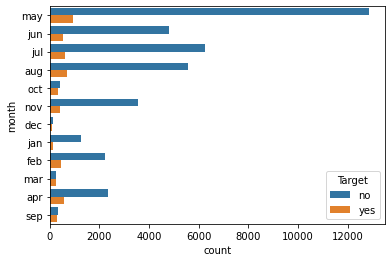

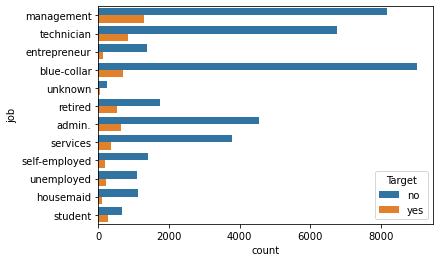

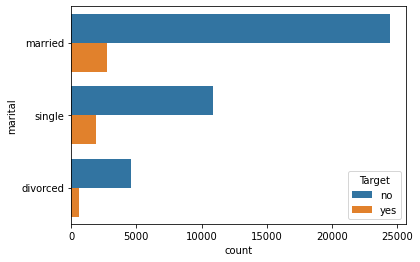

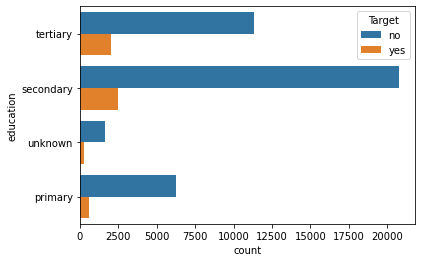

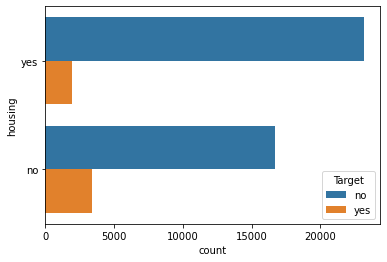

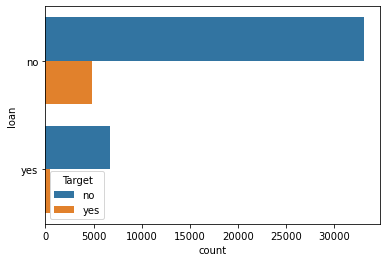

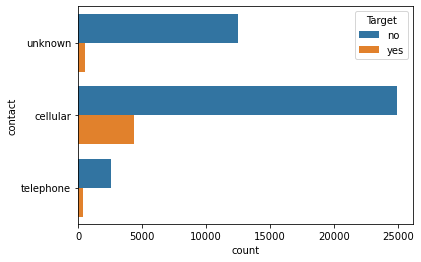

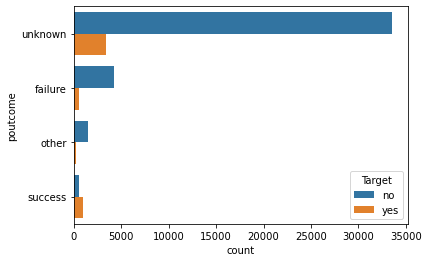

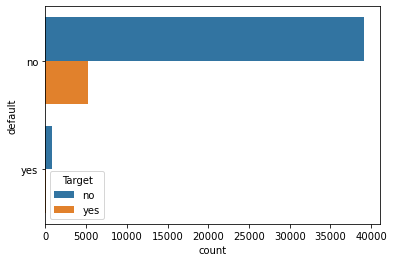

In [16]:
#Countplot for categorical variables.

for i in ['month','job', 'marital','education','housing', 'loan','contact','poutcome','default']:
    sns.countplot(data=pdata, y=i, hue='Target')
    plt.show()

***`Observations:`*** 

1. **Month:** Maximum data is for May. Highest numbers of Yes for Target were observed during Apr-Aug period.
2. **Job:** Management followed by technician has the highest numbers of both Yes and No.
3. **Marital:** Single seems highest percent wise and married looks the highest number wise for Yes Target cases.
4. **education:** Tertiary seems highest percent wise and secondary looks the highest number wise for Yes Target cases.
5. **housing:** Those who don't have housing seem to have higher number of Yes for Target both number and percent wise.
6. **loan:** Those who don't have loan seem to have higher number of Yes for Target both number and percent wise.
7. **contact:** Those who have cellular mode of contact seem to have higher number of Yes for Target both number and percent wise.
8. **poutcome:** Unknowns in this category seem to have higher number of Yes.
9. **default:** None of the defaulted cases have a Yes for Target.

In [17]:
pdata.groupby(["Target"]).mean().T

Target             no          yes
age         40.838986    41.670070
balance   1303.714969  1804.267915
day         15.892290    15.158253
duration   221.182806   537.294574
campaign     2.846350     2.141047
pdays       36.421372    68.702968
previous     0.502154     1.170354

In [18]:
pdata.groupby(["Target"]).median().T

Target     no  yes
age        39   38
balance   417  733
day        16   15
duration  164  426
campaign    2    2
pdays      -1   -1
previous    0    0

***`Observations:`*** 

1. Only non-categorical values could be analysed for mean and median.
2. For both mean and median, 'balance' and 'duration' are way higher for 'yes' 'Target' cases than 'no'. So this may be contradiction to our previous assumption that 'balance' and 'duration' are not related to 'Target'.
3. For remaining attributes, there is no significant difference between mean and median values for 'no' Vs. 'yes' cases of Target variable.
4. Further analysis will be performed after transformation of categorical variables.

<a href = #link1003> Click here</a> to jump to the further analysis.

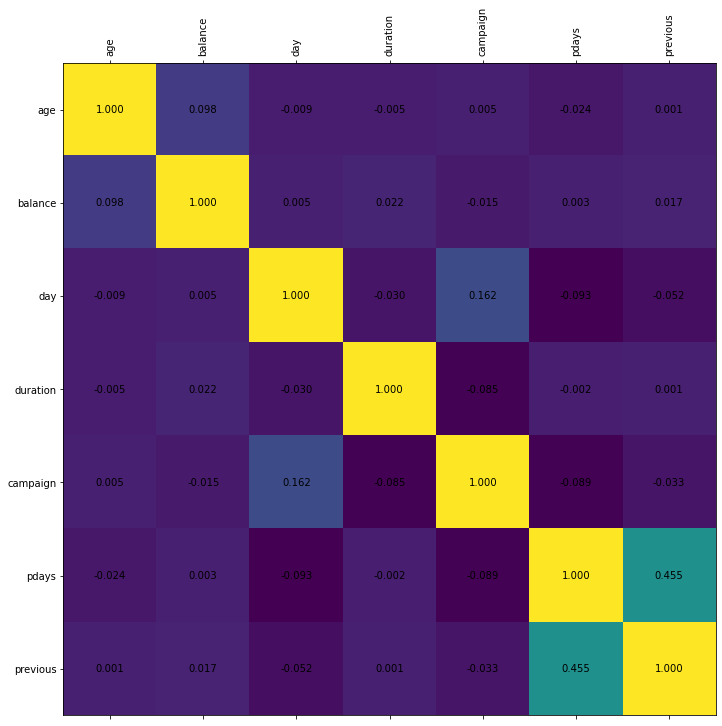

In [19]:
#sns.pairplot(pdata,diag_kind='kde')
pdata.corr().round(3)

# Plotting correlation to analyze how target variable "Personal Loan" is correlated with other variables
def plot_corr(df, size=12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plot_corr(pdata)

### *`Important Note:`* <a id = "link1004"></a>

Above map produced the output only for numeric variables, and therefore, it doesn't provide relationship of target variable with others. Therefore, to understand how "Target" variable is correlated with other variables (assuming that they are independant of each other), ***multivariate analysis*** is performed as follows.
After that, data will be transformed and some of the pending univariate analysis will be performed. <a href = #link1003> Click here</a> to jump to the further analysis. Lets convert the columns with an 'object' datatype into categorical variables. 

## **`Deliverable – 2 (Prepare the data for analytics):`** <a id = "link104"></a>

<a href = #link101> Back to Index </a>


### <a id = "link103"></a> ***`1. Ensure the attribute types are correct. If not, take appropriate actions.:`***

<a href = #link101> Back to Index </a>

In [20]:
#Step1: Loop through all columns in the dataframe. Replace strings with an integer.

pdata  = pd.read_csv('bank-full.csv')
for feature in pdata.columns: # Loop through all columns in the dataframe
    if pdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        pdata[feature] = pd.Categorical(pdata[feature])# Replace strings with an integer
pdata.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [21]:
#Step2: Get the datatypes of columns in dataframe to ensure correct datatype conversion.
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


#### *`Observation:`*

***Its worth noticing that memory usage has reduced from 5.9+ MB to 2.8 MB after above conversion.***

In [22]:
#Try to answer: Can we reduce the number of categories in field 'job' before building a model? Analyse the field for that.
print(pdata['job'].value_counts(normalize=True))
print('')

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64



### ***`2. Get the data model ready:`***  <a id = "link105"></a>


### ***`3. Transform the data i.e. scale / normalize if required:`*** 



**Note: Points 2 (Get the data model ready) and 3 (Transform the data i.e. scale / normalize if required) are answered together.**

<a href = #link101> Back to Index </a>

### *`Approach for Data Conversion:`*


1. Answer question: Can there be more values added to the column? e.g. In "marital", apart from the three categories ("single", "married", "divorced") there is a scope to add others. Therefore, it is considered as a one-hot column.
2. If the column contains category "unknown", it is considered as a complete / continuous column. It is considered as a part of replaceStruct below. "Unknown" and "other" are clubbed into one category.
3. For job, values are kept as follows:
     - blue-collar = 1
     - management = 2
     - technician, services, housemaid = 3
     - admin = 4
     - retired, unemployed, student = 5
     - self-employed, entrepreneur = 6
     - unknown = -1

In [23]:
#Step1: Create dictionaries to enumerate the categories.

replaceStruct = {
                "job":        {"blue-collar": 1, "management": 2, "technician": 3, "services": 3, 
                               "housemaid": 3, "admin.": 4, "retired": 5, "unemployed": 5, 
                               "student": 5, "self-employed": 6, "entrepreneur": 6, "unknown": -1},
                "education":  {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                "contact":    {"cellular": 1, "telephone": 2,"unknown": -1},
                "month":      {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
                               "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":   {"success": 1, "failure":2 , "other": -1, "unknown": -1},
                "Target":     {"no": 0, "yes": 1},
                "default":    {"no": 0, "yes": 1},
                "housing":    {"no": 0, "yes": 1},
                "loan":       {"no": 0, "yes": 1}    
                    }

#Step2: One hot encoding for marital status
oneHotCols=["marital"]

In [24]:
#Step3: Replace categories with the the structures created above.

pdata=pdata.replace(replaceStruct)
pdata=pd.get_dummies(pdata, columns=oneHotCols)
pdata.head(10)

age  job  education  default  balance  housing  loan  contact  day  month  \
0   58    2          3        0     2143        1     0       -1    5      5   
1   44    3          2        0       29        1     0       -1    5      5   
2   33    6          2        0        2        1     1       -1    5      5   
3   47    1         -1        0     1506        1     0       -1    5      5   
4   33   -1         -1        0        1        0     0       -1    5      5   
5   35    2          3        0      231        1     0       -1    5      5   
6   28    2          3        0      447        1     1       -1    5      5   
7   42    6          3        1        2        1     0       -1    5      5   
8   58    5          1        0      121        1     0       -1    5      5   
9   43    3          2        0      593        1     0       -1    5      5   

   duration  campaign  pdays  previous  poutcome  Target  marital_divorced  \
0       261         1     -1         0        -1       0                 0   
1       151         1     -1         0        -1       0                 0   
2        76         1     -1         0        -1       0                 0   
3        92         1     -1         0        -1       0                 0   
4       198         1     -1         0        -1       0                 0   
5       139         1     -1         0        -1       0                 0   
6       217         1     -1         0        -1       0                 0   
7       380         1     -1         0        -1       0                 1   
8        50         1     -1         0        -1       0                 0   
9        55         1     -1         0        -1       0                 0   

   marital_married  marital_single  
0                1               0  
1                0               1  
2                1               0  
3                1               0  
4                0               1  
5                1               0  
6                0               1  
7                0               0  
8                1               0  
9                0               1

### ***`Let's continue with further EDA:`*** <a id = "link1003"></a>

<a href = #link102> Click here </a> to go back to start of EDA.

In [25]:
#Step1: Get the datatypes of columns in dataframe to ensure correct datatype conversion.
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   default           45211 non-null  int64
 4   balance           45211 non-null  int64
 5   housing           45211 non-null  int64
 6   loan              45211 non-null  int64
 7   contact           45211 non-null  int64
 8   day               45211 non-null  int64
 9   month             45211 non-null  int64
 10  duration          45211 non-null  int64
 11  campaign          45211 non-null  int64
 12  pdays             45211 non-null  int64
 13  previous          45211 non-null  int64
 14  poutcome          45211 non-null  int64
 15  Target            45211 non-null  int64
 16  marital_divorced  45211 non-null  uint8
 17  marital_married   45211 non-nul

In [26]:
#Re-performing median analysis for Target. mean analysis may not be value added for categorical columns.

pdata.groupby(["Target"]).median().T

Target              0    1
age                39   38
job                 3    3
education           2    2
default             0    0
balance           417  733
housing             1    0
loan                0    0
contact             1    1
day                16   15
month               6    6
duration          164  426
campaign            2    2
pdays              -1   -1
previous            0    0
poutcome           -1   -1
marital_divorced    0    0
marital_married     1    1
marital_single      0    0

#### *`Observation:`*

***Its worth noticing that memory usage has increased from 2.8 MB to 5.6 MB after above conversion. All the columns are non-null numeric columns. Nothing significant to add to previous analysis***

To carry out further analysis, and understand how target variable is correlated with other variables (assuming that they are independent), following heat map is plotted.

In [27]:
#Calculate % of Target for 1 vs 0.
n_true = len(pdata.loc[pdata['Target'] == 1])
n_false = len(pdata.loc[pdata['Target'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 5289 (11.70%)
Number of false cases: 39922 (88.30%)


***`Observations:`*** 11.70% of the clients in the dataset subscribed a term deposit.

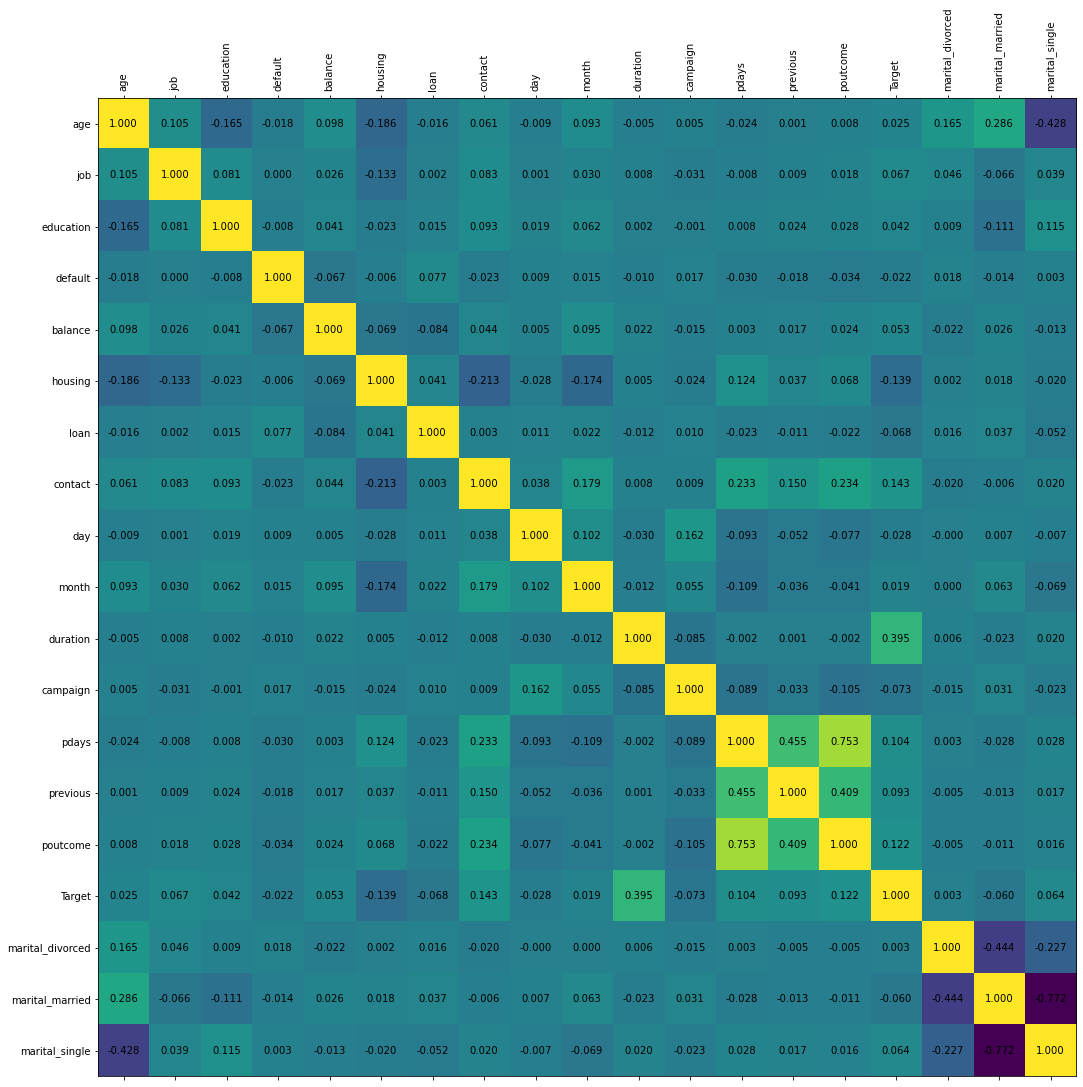

In [28]:
#Step2: Plot a heatmap to understand how Target variable is correlated with other variables.

#sns.pairplot(pdata,diag_kind='kde')
pdata.corr().round(3)

# Plotting correlation to analyze how target variable "Personal Loan" is correlated with other variables
def plot_corr(df, size=18):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plot_corr(pdata)

#### *`Observations:`*

1. **`'age':`** 0.025. Weak positive.
2. **`'job':`** 0.067. Weak positive.
3. **`'education':`** 0.042. Weak positive.
4. **`'default':`** -0.022. Weak negative.
5. **`'balance':`** 0.053. Weak positive.
6. **`'housing':`** -0.139. Negative. Strongest in negative.
7. **`'loan':`** -0.068. Weak negative.
8. **`'contact':`** 0.143. Fairly positive.
9. **`'day':`** -0.028. Weak negative.
10. **`'month':`** 0.019. Weak positive.
11. **`'duration':`** 0.395. Strongest correlation compared to all other variables. Also, this contradicts <a href = #link1006> previous statement</a> that this variable is not correlated with target.
12. **`'campaign':`** -0.073. Weak negative.
13. **`'pdays':`** 0.104. Fairly positive.
14. **`'previous':`** 0.093. Fairly positive.
15. **`'poutcome':`** 0.122. Fairly positive.
16. **`'marital_divorced':`** 0.003. Very weak positive.
17. **`'marital_married':`** -0.060. Weak negative.
18. **`'marital_single':`** 0.064. Weak positive.

The following pairs of attributes have similar correlation with the target variable.

1. 'marital_divorced': Weakest correlation. Could be dropped from further model building.
2. Pair1 (Between 0.02 and 0.03 +ve or -ve): 'age', 'default', 'day', 'month' (0.019)
3. Pair2 (Between 0.03 and 0.08 +ve or -ve): 'job', 'education', 'balance', 'loan', 'campaign', 'marital_married', 'marital_single'
4. Pair3 (Between 0.08 and above): 'housing', 'contact', 'duration', 'pdays', 'previous', 'poutcome'

**Note:** Pdays, previous, and poutcome are highly correlated to each other. This may have an impact on logistic regression because of multi-colinearity.

## ***`4. Create the training set and test set in ratio of 70:30:`*** <a id = "link106"></a>

<a href = #link101> Back to Index </a>

#### ***`Approach:`***

Target Variable: Target

1. Use all columns as-is.
2. Based on the observations so far, only the column "balance" needs an imputation. Imputation strategy: mean.

In [29]:
#Perform Imputation
#from sklearn.impute import SimpleImputer #Import library if not already imported.

##Imputation of Experience
#Assumption: Experience can be either be 0 or +ve. It can't be -ve:

#Step1: Find a list of unique values for Experience column where value is either 0 or negative.
n = pdata[pdata['balance'] == 0].balance.unique()

#Step2: Replace every 0 value with mean
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['balance']
imputer = rep_0.fit(pdata[cols])
pdata[cols] = imputer.transform(pdata[cols])

In [30]:
pdata.nunique()

age                   77
job                    7
education              4
default                2
balance             7168
housing                2
loan                   2
contact                3
day                   31
month                 12
duration            1573
campaign              48
pdays                559
previous              41
poutcome               3
Target                 2
marital_divorced       2
marital_married        2
marital_single         2
dtype: int64

In [31]:
print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

age                     0
job                     0
education               0
default             44396
balance                 0
housing             20081
loan                37967
contact                 0
day                     0
month                   0
duration                3
campaign                0
pdays                   0
previous            36954
poutcome                0
Target              39922
marital_divorced    40004
marital_married     17997
marital_single      32421
dtype: int64


<a id = "link1007"></a> ***`Insight:`***: Data is imputed as per the strategy. In summary, zeros have been replaced with mean wherever necessary, and data type conversion is done, as and when needed. Now data is ready for further processing 

In [32]:
#Splitting Data to create training and testing datasets
#from sklearn.model_selection import train_test_split #Import library if not already imported.

#Drop target variable and form X
X = pdata.drop(['Target'],axis=1) 
#All columns after imputation except the target variable i.e. Personal Loan

#Only include target variable and form Y
Y = pdata['Target']
#Target Variable, i.e. Personal Loan (1=True, 0=False)

#Split original data to form 70% training and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#1 is just any random seed number

In [33]:
#Check the volume of data available in training and testing dataset.

print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [34]:
#Perform frequency analysis for 'Personal Loan' (values 0s and 1s) in original, training, and testing data

#Original
print("Original Target True Values    : {0} ({1:0.2f}%)"
      .format(len(pdata.loc[pdata['Target'] == 1])
              , (len(pdata.loc[pdata['Target'] == 1])/len(pdata.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)"
      .format(len(pdata.loc[pdata['Target'] == 0])
              , (len(pdata.loc[pdata['Target'] == 0])/len(pdata.index)) * 100))
print("")

#Training
print("Training Target True Values    : {0} ({1:0.2f}%)"
      .format(len(y_train[y_train[:] == 1])
              , (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)"
      .format(len(y_train[y_train[:] == 0])
              , (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

#Testing
print("Test Target True Values        : {0} ({1:0.2f}%)"
      .format(len(y_test[y_test[:] == 1])
              , (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)"
      .format(len(y_test[y_test[:] == 0])
              , (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



***`Insight:`*** True and False values seem properly balanced in training and testing datasets.

<a href = #link1008> To Ensemble Model </a>

# `Deliverable – 3 (Create The Ensemble Model)` <a id = "link107"></a>

<a href = #link101> Back to Index </a>

## ***`1.a. Create models using Logistic Regression. Note the model performance.`***  <a id = "link108"></a>

<a href = #link101> Back to Index </a>

In [35]:
#Step1: Model Selection
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=1,penalty='l2', solver=i,max_iter=10000)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.89, 0.892, 0.888, 0.887]

[0.891, 0.889, 0.891, 0.887, 0.887]


***`Insight:`*** It appears that all models have good train and test scores. But 'newton-cg' and 'lbfgs' have the best scores for penalty = 'l2'.

In [36]:
#Step2: Perform same steps as above, but keep penalty = 'l1'. 
#In this case, only those solvers which work with 'l1' are considered.

train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i,max_iter=10000)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.892, 0.887]

[0.891, 0.887]


***`Insight:`*** It appears that 'liblinear' with 'l1' has the same scores as 'newton-cg' and 'lbfgs' with l2. Therefore, perform additional analysis on these three models with different values of C.

In [37]:
#Analysis1: Analysis for liblinear with l1

print("solver = liblinear, penalty = l1:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)


#Analysis2: Analysis for liblinear with l2

print("\nsolver = liblinear, penalty = l2:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2',solver='liblinear',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

#Analysis3: Analysis for newton-cg with l2

print("\nsolver = newton-cg, penalty = l2:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

solver = liblinear, penalty = l1:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.891, 0.892, 0.892, 0.892, 0.892, 0.892]
[0.89, 0.891, 0.891, 0.891, 0.891, 0.891]

solver = liblinear, penalty = l2:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.89, 0.892, 0.892, 0.892, 0.892, 0.892]
[0.89, 0.89, 0.891, 0.891, 0.891, 0.891]

solver = newton-cg, penalty = l2:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.892, 0.892, 0.892, 0.892, 0.892, 0.892]
[0.892, 0.891, 0.891, 0.891, 0.891, 0.891]


### <a id = "link2"></a> ***`Conclusion on Model Selection:`*** 

Based on all the above observations, the model chosen is as follows:
- Solver = liblinear. No significant differences in scores found when compared the scores of the shortlisted solvers. However, the definition of ***LogisticRegression function in Python*** suggests that for smaller datasets, liblinear is a good choice. Considering these two factors, liblinear is chosen.
- It could be observed that liblinear is faster than newton-cg
- C= 1. Value greater than or equal to 0.25 provides the best score for all solvers, including liblinear, which is our choice of solver.
- Penalty= l1. Just chosen randomly, because both l1 and l2 shown similar results.
- max_iter=10000: If default value is not changed, we get warning: "the coef_ did not converge", ConvergenceWarning

<a href = #link101> Back to Index </a>

In [38]:
#Train and test data using the model of our choice:
# Fit the model on train
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',max_iter=10000,C = 1)
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0  0.001832  0.070405  0.117924 -0.485973  0.00002 -0.998193 -0.683797   

          7        8        9       10        11        12        13  \
0  0.486034 -0.00585 -0.00228  0.00411 -0.132961  0.000789  0.070159   

         14        15        16       17  intercept  
0  0.201761 -1.729439 -1.869665 -1.48485  -1.595187  


<AxesSubplot:>

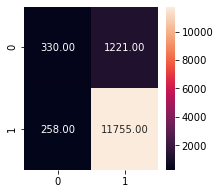

In [39]:
#Print confusion matrix:

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )

<a id = "link1011"></a> ***`Important Note:`*** Since we are going to evaluate many models in this exercise, creating a data frame "model_scores" to evaluate model performance at one go. 

Jump to the analysis of <a href = #link111>model_scores</a>

In [40]:
#Since we are going to evaluate many models in this exercise, creating a data frame to evaluate model performance at one go

model_scores = pd.DataFrame(index=['Training','Testing','Recall','Precision','F1 Score','Roc Auc Score'],
                   columns=['Logistic Regression','Decision Tree','Bagging','AdaBoosting','GradientBoost','RandomForest'])

model_scores['Logistic Regression'] = [model.score(x_train, y_train), model.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]
model_scores

Logistic Regression Decision Tree Bagging AdaBoosting  \
Training                  0.892059           NaN     NaN         NaN   
Testing                   0.890961           NaN     NaN         NaN   
Recall                    0.212766           NaN     NaN         NaN   
Precision                 0.561224           NaN     NaN         NaN   
F1 Score                  0.308555           NaN     NaN         NaN   
Roc Auc Score             0.595645           NaN     NaN         NaN   

              GradientBoost RandomForest  
Training                NaN          NaN  
Testing                 NaN          NaN  
Recall                  NaN          NaN  
Precision               NaN          NaN  
F1 Score                NaN          NaN  
Roc Auc Score           NaN          NaN

***`Insight:`*** All the values are on a lower side, indicating that there is a scope for improvement in this model. Recall is comparatively lower. But low recall seems a good option in this case. This is because the outcome of this model might be used for target campaigning. If so, then customers who fall in True-Positive, False-Positive, and False-Negative can be potential customers that may take personal loans. Here, business will benefit from False-Positives and False-Negative cases. And True-Negatives are can be excluded from the campaign. 

<a href = #link101> Back to Index </a>

## ***`1.b. Create models using Decision Tree algorithm. Note the model performance`***  <a id = "link109"></a>

<a href = #link101> Back to Index </a>

In [41]:
#Create a decision tress without default parameters except for criterion and random_state

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

***`Insight:`*** criterion = 'entropy' showed slightly better results than 'gini'

In [42]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

#predict on test
y_predict = dTree.predict(x_test)

model_scores['Decision Tree_Overfit'] = [dTree.score(x_train, y_train), dTree.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

1.0
0.8770274255381894


Logistic Regression Decision Tree Bagging AdaBoosting  \
Training                  0.892059           NaN     NaN         NaN   
Testing                   0.890961           NaN     NaN         NaN   
Recall                    0.212766           NaN     NaN         NaN   
Precision                 0.561224           NaN     NaN         NaN   
F1 Score                  0.308555           NaN     NaN         NaN   
Roc Auc Score             0.595645           NaN     NaN         NaN   

              GradientBoost RandomForest  Decision Tree_Overfit  
Training                NaN          NaN               1.000000  
Testing                 NaN          NaN               0.877027  
Recall                  NaN          NaN               0.488072  
Precision               NaN          NaN               0.464132  
F1 Score                NaN          NaN               0.475801  
Roc Auc Score           NaN          NaN               0.707659

***`Observation:`*** The model looks overfit, as expected

In [43]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(x_train)
                                ,class_names = list(train_char_label))
Credit_Tree_File.close()

In [44]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

***`Observation:`***: **Very deep tree. Save the above image and open in an image viewer for better clarity.**

In [45]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, random_state=1
                               ,min_samples_leaf = 10, min_samples_split = 2, splitter = "best")
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.914589060574462
0.9050427602477146


***`Insight:`*** At max_depth = 8, testing score is highest. The values of parameters in above DecisionTreeClassifier are fixed after several trials and errors.

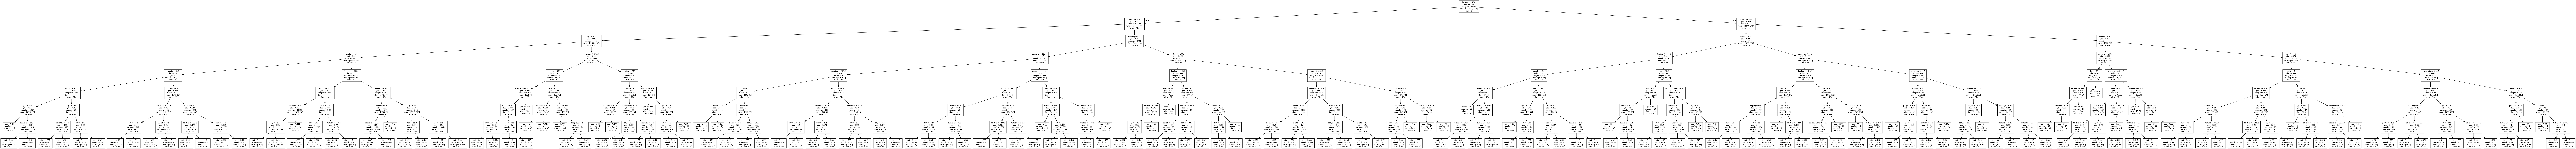

In [46]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(x_train)
                                , class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

***`Note:`*** **Save the above image and open in an image viewer for better clarity.**

In [47]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
age               0.055405
job               0.004796
education         0.002873
default           0.000000
balance           0.015383
housing           0.093559
loan              0.001908
contact           0.032328
day               0.057305
month             0.059137
duration          0.493991
campaign          0.008757
pdays             0.097201
previous          0.001730
poutcome          0.070777
marital_divorced  0.002737
marital_married   0.000874
marital_single    0.001238


***`Note:`*** **As observed in the EDA (Heat Map), it can be observed that duration is the most important influencer amongst all the attributes.**

<AxesSubplot:>

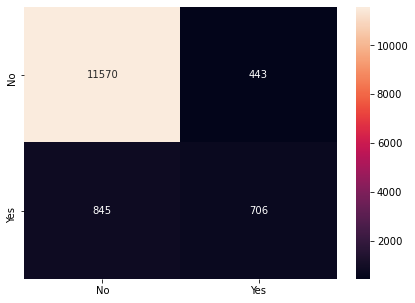

In [48]:
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [49]:
#Print performance indicators for the model

model_scores['Decision Tree'] = [dTreeR.score(x_train, y_train), dTreeR.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

Logistic Regression  Decision Tree Bagging AdaBoosting  \
Training                  0.892059       0.914589     NaN         NaN   
Testing                   0.890961       0.905043     NaN         NaN   
Recall                    0.212766       0.455190     NaN         NaN   
Precision                 0.561224       0.614447     NaN         NaN   
F1 Score                  0.308555       0.522963     NaN         NaN   
Roc Auc Score             0.595645       0.709157     NaN         NaN   

              GradientBoost RandomForest  Decision Tree_Overfit  
Training                NaN          NaN               1.000000  
Testing                 NaN          NaN               0.877027  
Recall                  NaN          NaN               0.488072  
Precision               NaN          NaN               0.464132  
F1 Score                NaN          NaN               0.475801  
Roc Auc Score           NaN          NaN               0.707659

Overall performance has improved compared with the logistic regression.

## ***`2. Build the ensemble models `***  <a id = "link110"></a>

<a href = #link101> Back to Index </a>

### ***`Ensemble Learning - Bagging`***

<a href = #link101> Back to Index </a>

In [50]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1,max_samples= .74)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.9061486287230905


<AxesSubplot:>

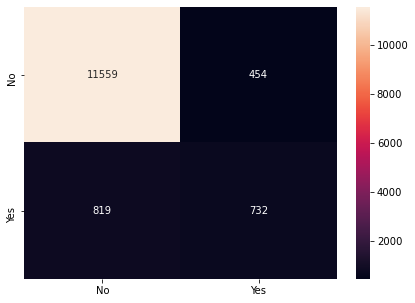

In [51]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [52]:
#Print performance indicators for the model

model_scores['Bagging'] = [bgcl.score(x_train, y_train), bgcl.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

Logistic Regression  Decision Tree   Bagging AdaBoosting  \
Training                  0.892059       0.914589  0.995829         NaN   
Testing                   0.890961       0.905043  0.906149         NaN   
Recall                    0.212766       0.455190  0.471954         NaN   
Precision                 0.561224       0.614447  0.617201         NaN   
F1 Score                  0.308555       0.522963  0.534892         NaN   
Roc Auc Score             0.595645       0.709157  0.717081         NaN   

              GradientBoost RandomForest  Decision Tree_Overfit  
Training                NaN          NaN               1.000000  
Testing                 NaN          NaN               0.877027  
Recall                  NaN          NaN               0.488072  
Precision               NaN          NaN               0.464132  
F1 Score                NaN          NaN               0.475801  
Roc Auc Score           NaN          NaN               0.707659

### ***`Ensemble Learning - AdaBoosting`***

<a href = #link101> Back to Index </a>

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=90, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

***`Note:`*** **n_estimators = 90 provides high value of model score.**

0.9009879091713359


<AxesSubplot:>

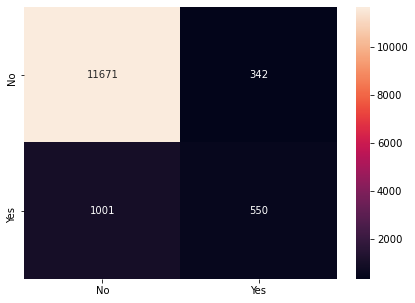

In [54]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [55]:
#Print performance indicators for the model

model_scores['AdaBoosting'] = [abcl.score(x_train, y_train), abcl.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

Logistic Regression  Decision Tree   Bagging  AdaBoosting  \
Training                  0.892059       0.914589  0.995829     0.900149   
Testing                   0.890961       0.905043  0.906149     0.900988   
Recall                    0.212766       0.455190  0.471954     0.354610   
Precision                 0.561224       0.614447  0.617201     0.616592   
F1 Score                  0.308555       0.522963  0.534892     0.450266   
Roc Auc Score             0.595645       0.709157  0.717081     0.663070   

              GradientBoost RandomForest  Decision Tree_Overfit  
Training                NaN          NaN               1.000000  
Testing                 NaN          NaN               0.877027  
Recall                  NaN          NaN               0.488072  
Precision               NaN          NaN               0.464132  
F1 Score                NaN          NaN               0.475801  
Roc Auc Score           NaN          NaN               0.707659

### ***`Ensemble Learning - GradientBoost`***

<a href = #link101> Back to Index </a>

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 92,random_state=1)
gbcl = gbcl.fit(x_train, y_train)


***`Note:`*** **n_estimators = 92 provides high value of model score.**

0.9068121498083161


<AxesSubplot:>

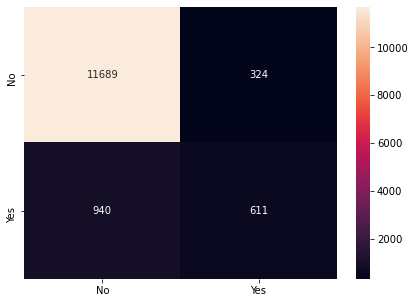

In [57]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
#Print performance indicators for the model

model_scores['GradientBoost'] = [gbcl.score(x_train, y_train), gbcl.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

Logistic Regression  Decision Tree   Bagging  AdaBoosting  \
Training                  0.892059       0.914589  0.995829     0.900149   
Testing                   0.890961       0.905043  0.906149     0.900988   
Recall                    0.212766       0.455190  0.471954     0.354610   
Precision                 0.561224       0.614447  0.617201     0.616592   
F1 Score                  0.308555       0.522963  0.534892     0.450266   
Roc Auc Score             0.595645       0.709157  0.717081     0.663070   

               GradientBoost RandomForest  Decision Tree_Overfit  
Training            0.909912          NaN               1.000000  
Testing             0.906812          NaN               0.877027  
Recall              0.393939          NaN               0.488072  
Precision           0.653476          NaN               0.464132  
F1 Score            0.491553          NaN               0.475801  
Roc Auc Score       0.683484          NaN               0.707659

### ***`Ensemble RandomForest Classifier`***

<a href = #link101> Back to Index </a>

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 93, random_state=1,max_features=10)
rfcl = rfcl.fit(x_train, y_train)

***`Note:`*** **n_estimators = 93 provides high value of model score.**

0.9086552639339428


<AxesSubplot:>

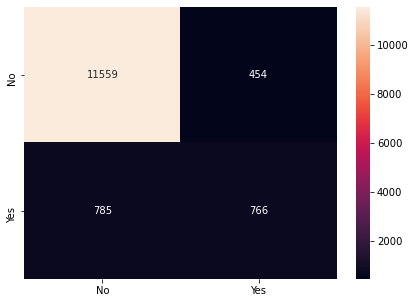

In [60]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [61]:
#Print performance indicators for the model

model_scores['RandomForest'] = [rfcl.score(x_train, y_train), rfcl.score(x_test, y_test)
                                      , recall_score(y_test,y_predict), precision_score(y_test,y_predict)
                                      , f1_score(y_test,y_predict), roc_auc_score(y_test,y_predict)]

model_scores

Logistic Regression  Decision Tree   Bagging  AdaBoosting  \
Training                  0.892059       0.914589  0.995829     0.900149   
Testing                   0.890961       0.905043  0.906149     0.900988   
Recall                    0.212766       0.455190  0.471954     0.354610   
Precision                 0.561224       0.614447  0.617201     0.616592   
F1 Score                  0.308555       0.522963  0.534892     0.450266   
Roc Auc Score             0.595645       0.709157  0.717081     0.663070   

               GradientBoost  RandomForest  Decision Tree_Overfit  
Training            0.909912      0.999937               1.000000  
Testing             0.906812      0.908655               0.877027  
Recall              0.393939      0.493875               0.488072  
Precision           0.653476      0.627869               0.464132  
F1 Score            0.491553      0.552869               0.475801  
Roc Auc Score       0.683484      0.728041               0.707659

## ***`3. Make a DataFrame to compare models and their metrics.`***  <a id = "link111"></a>

<a href = #link101> Back to Index </a>

Data Frame is already prepared <a href = #link1011>here</a>. <a id = "link1011"></a>

In [62]:
model_scores

Logistic Regression  Decision Tree   Bagging  AdaBoosting  \
Training                  0.892059       0.914589  0.995829     0.900149   
Testing                   0.890961       0.905043  0.906149     0.900988   
Recall                    0.212766       0.455190  0.471954     0.354610   
Precision                 0.561224       0.614447  0.617201     0.616592   
F1 Score                  0.308555       0.522963  0.534892     0.450266   
Roc Auc Score             0.595645       0.709157  0.717081     0.663070   

               GradientBoost  RandomForest  Decision Tree_Overfit  
Training            0.909912      0.999937               1.000000  
Testing             0.906812      0.908655               0.877027  
Recall              0.393939      0.493875               0.488072  
Precision           0.653476      0.627869               0.464132  
F1 Score            0.491553      0.552869               0.475801  
Roc Auc Score       0.683484      0.728041               0.707659

### ***`Observations:`***

1. Parameters used for performance measurement: Testing Score, Recall, Precision, F1 Score, and ROC AUC Score.
2. Logistic Regression has worst score for all the parameters.
3. Order of Testing scores from lowest to highest is: Decision Tree_Overfit < Logistic Regression < AdaBoosting <  Decision Tree < Bagging < GradientBoost < RandomForest. RandomForest has the highest Testing Score.
3. Order of Recall scores from lowest to highest is: Logistic Regression < AdaBoosting < GradientBoost < Decision Tree < Bagging < Decision Tree_Overfit < RandomForest. RandomForest has the highest Score.
4. Order of Precision scores from lowest to highest is: Decision Tree_Overfit < Logistic Regression  <  Decision Tree < AdaBoosting < Bagging < RandomForest < GradientBoost. GradientBoost has the highest Score.
5. Order of F1 Scores from lowest to highest is: Logistic Regression < AdaBoosting < Decision Tree_Overfit < GradientBoost < Decision Tree < Bagging < RandomForest. RandomForest has the highest Score.
6. Order of F1 Scores from lowest to highest is: Logistic Regression < AdaBoosting < GradientBoost < Decision Tree_Overfit  < Decision Tree < Bagging < RandomForest. RandomForest has the highest Score.
8. For AdaBoosting, Testing score is better than Training score.

### ***`Conclusion:`***

- Based on above observations, RandomForest seems to be the best model. It has higher score for all the model parameters, except for Precision. However, the outcome of this model might be used for promotional purposes, Precision may not be a a parameter of high importance in this case. Moreover, the difference between GradientBoost and RandomForest is not drastic.